In [ ]:
%%capture
%pip install neqsim

#To check for methods in a Java object 
#from neqsim import methods

# Experimental data
Experimental data for thermal conductivity of hydrogen is collected.

In [1]:
import pandas as pd
expdata_df = pd.read_csv('../../../data/physicalproperties/thermalconductivity/hydrogen.csv')
expdata_df

,Fluid,Property,Dataset,#T (K),P(Mpa),H2(mol fraction),rho(kg/m3),Z,Visc(Pa s),Thermal Conductivity (W/K/m),Run,JT,T ( C),T ( R)
0,H2,TC,Carey1974,295.150,0.146,NaN,NaN,NaN,NaN,0.17900,NaN,NaN,NaN,NaN
1,H2,TC,Carey1974,295.290,0.400,NaN,NaN,NaN,NaN,0.18000,NaN,NaN,NaN,NaN
2,H2,TC,Carey1974,295.260,0.563,NaN,NaN,NaN,NaN,0.17900,NaN,NaN,NaN,NaN
3,H2,TC,Carey1974,295.250,0.670,NaN,NaN,NaN,NaN,0.18000,NaN,NaN,NaN,NaN
4,H2,TC,Carey1974,297.160,0.924,NaN,NaN,NaN,NaN,0.18000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,H2,TC,Roder1984,311.734,1.009,NaN,NaN,NaN,NaN,0.19154,NaN,NaN,NaN,NaN
450,H2,TC,Roder1984,312.130,1.009,NaN,NaN,NaN,NaN,0.19307,NaN,NaN,NaN,NaN
451,H2,TC,Roder1984,312.545,1.009,NaN,NaN,NaN,NaN,0.19236,NaN,NaN,NaN,NaN
452,H2,TC,Roder1984,313.068,1.009,NaN,NaN,NaN,NaN,0.19313,NaN,NaN,NaN,NaN


<Figure size 640x480 with 0 Axes>

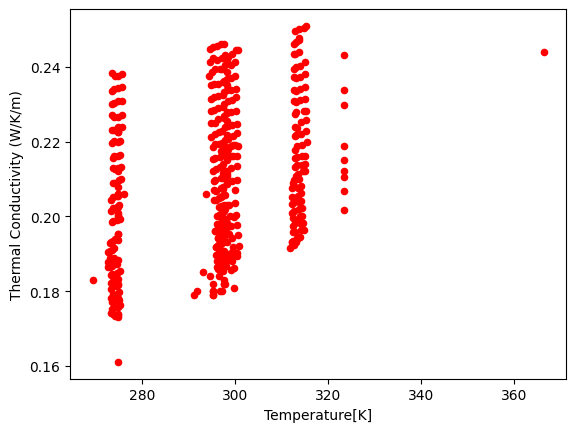

In [3]:
from matplotlib import pyplot as plt
fig = plt.figure()

expdata_df.plot(x='#T (K)', y='Thermal Conductivity (W/K/m)', kind='scatter',ylabel='Thermal Conductivity (W/K/m)', xlabel='Temperature[K]',color='red')

plt.show()

In [4]:
referenceList = expdata_df['Dataset'].unique().tolist()
temperatureList = expdata_df['#T (K)'].unique().tolist()
pressureList = expdata_df['P(Mpa)'].unique().tolist()
data = expdata_df.groupby(['#T (K)'])['P(Mpa)'].count()
print('references ', referenceList)
print('temperature ', temperatureList)
print('pressure ', pressureList)
print('numer of data points for each temperature:')
print(data)

references  ['Carey1974', 'Hamrin1966', 'Roder1984']
temperature  [295.15, 295.29, 295.26, 295.25, 297.16, 291.08, 291.79, 296.73, 297.78, 297.57, 297.47, 297.56, 269.31, 296.53, 294.6, 299.19, 299.15, 274.75, 298.15, 323.35, 297.768, 298.415, 299.194, 300.09, 300.631, 297.711, 298.214, 298.99, 299.845, 297.491, 298.203, 299.058, 300.016, 297.556, 298.134, 299.143, 300.119, 297.614, 298.347, 299.21, 300.201, 297.577, 298.253, 299.14, 300.177, 297.686, 298.435, 299.335, 300.433, 297.777, 298.473, 299.408, 300.455, 297.744, 298.51, 299.421, 300.493, 297.338, 299.537, 300.024, 298.98, 298.075, 296.934, 297.362, 298.2, 299.088, 300.273, 297.331, 298.263, 299.145, 300.265, 300.41, 299.195, 298.212, 297.402, 297.074, 297.861, 293.753, 299.838, 297.126, 297.849, 298.734, 299.842, 297.138, 297.992, 298.92, 300.086, 297.221, 298.019, 299.112, 300.315, 297.355, 298.273, 299.323, 300.545, 297.425, 299.322, 299.453, 300.748, 297.505, 298.485, 299.64, 300.259, 297.716, 298.651, 299.788, 300.348, 29

# Evaluation of experimental data

In this section the experimental data will be evaluated and eventual some data sets will be removed from the set.

# Compare to NeqSim Calculations

## NeqSim calculations

In [12]:
data323 = expdata_df.loc[expdata_df['#T (K)'] == 323.350]
data323

,Fluid,Property,Dataset,#T (K),P(Mpa),H2(mol fraction),rho(kg/m3),Z,Visc(Pa s),Thermal Conductivity (W/K/m),Run,JT,T ( C),T ( R)
56,H2,TC,Hamrin1966,323.35,7.366327,NaN,NaN,NaN,NaN,0.201669,NaN,NaN,NaN,NaN
57,H2,TC,Hamrin1966,323.35,10.973498,NaN,NaN,NaN,NaN,0.206690,NaN,NaN,NaN,NaN
58,H2,TC,Hamrin1966,323.35,14.195633,NaN,NaN,NaN,NaN,0.210455,NaN,NaN,NaN,NaN
59,H2,TC,Hamrin1966,323.35,17.691345,NaN,NaN,NaN,NaN,0.212129,NaN,NaN,NaN,NaN
60,H2,TC,Hamrin1966,323.35,26.658607,NaN,NaN,NaN,NaN,0.215058,NaN,NaN,NaN,NaN
61,H2,TC,Hamrin1966,323.35,35.220570,NaN,NaN,NaN,NaN,0.218823,NaN,NaN,NaN,NaN
62,H2,TC,Hamrin1966,323.35,55.424775,NaN,NaN,NaN,NaN,0.229702,NaN,NaN,NaN,NaN
63,H2,TC,Hamrin1966,323.35,62.426333,NaN,NaN,NaN,NaN,0.233886,NaN,NaN,NaN,NaN
64,H2,TC,Hamrin1966,323.35,66.935295,NaN,NaN,NaN,NaN,0.243090,NaN,NaN,NaN,NaN


<Figure size 640x480 with 0 Axes>

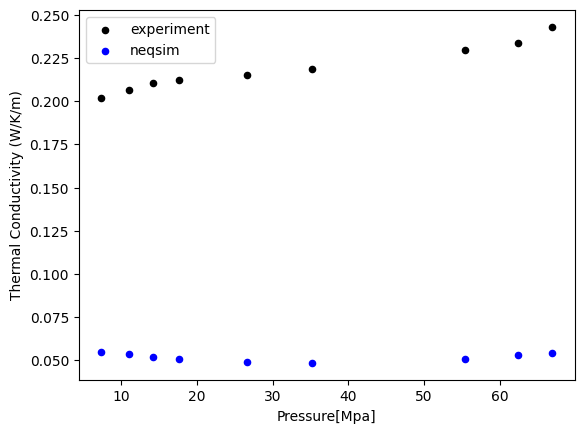

In [22]:
import neqsim
from neqsim.thermo.thermoTools import fluid, TPflash, fluidComposition,bubp
import pandas as pd
import numpy as np

fluid1 = fluid('pr')
fluid1.addComponent('hydrogen', 1.0)
fluid1.setTemperature(0.0, 'C')
fluid1.setPressure(100.0, 'bara')

def cond(pres):
    #see methods: https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/ViscosityOfFluids.ipynb#scrollTo=PzWrasHBWB3X
    #fluid1.getPhase('gas').getPhysicalProperties().setViscosityModel(method)
    fluid1.setPressure(pres, 'MPa')
    try:
        TPflash(fluid1)
        #method = "PFCT"
        #fluid1.getPhase('gas').getPhysicalProperties().setConductivityModel(method)
        fluid1.initProperties()
        return fluid1.getPhase('gas').getThermalConductivity('W/mK')
    except:
        return float("nan")
pressures = data323['P(Mpa)'].values.tolist()
cond_res = [cond(P) for P in pressures]

dataWithExperiment = data323.assign(calc_cond = cond_res)

from matplotlib import pyplot as plt
fig = plt.figure()	
plot1 = dataWithExperiment.plot(x='P(Mpa)', y='Thermal Conductivity (W/K/m)', kind='scatter',ylabel='Thermal Conductivity (W/K/m)', xlabel='Pressure[MPa]',color='black')	
dataWithExperiment.plot(ax=plot1, x='P(Mpa)', y='calc_cond', kind='scatter',ylabel='Thermal Conductivity (W/K/m)', xlabel='Pressure[Mpa]',color='blue')	
plt.legend(['experiment', 'neqsim'])
plt.show()

# Parameter fitting

## Manual fitting

## Automatic fitting